**Задание**

1. Возьмите произовльную базу для задачи сегментации изображений.
2. Обучите 4 различных модели на оригинальных данных. Сохраните результаты.
Нельзя использовать обрезанные данные и меньше четырех моделей.

In [1]:
# Решение

%%capture
%pip install TerraSegmentation==0.0.1
%pip install numpy==1.23.0

In [2]:
# импорт модуля
from TerraSegmentation import TerraSegmentation as terra_seg
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import os

In [3]:
# загрузка и распаковка архива с данными
terra_seg.gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l14/construction_256x192.zip', None, quiet=False)
!unzip -q 'construction_256x192.zip' -d 'construction' # распаковываем архив

Downloading...
From: https://storage.yandexcloud.net/aiueducation/Content/base/l14/construction_256x192.zip
To: /content/construction_256x192.zip
100%|██████████| 214M/214M [00:15<00:00, 13.9MB/s]


In [4]:
!rm -r sample_data construction_256x192.zip

In [5]:
# объявление переменных
folder = 'construction'
subset1 = 'train/original'
subset2 = 'train/segment'
IMG_WIDTH = 256
IMG_HEIGHT = 192

Выборка train/original загружена, количество изображений: 1900
Выборка train/segment загружена, количество изображений: 1900

Проанализировано 100 случайных изображений из базы. Результат анализа:

Количество возможных классов 25.
(200, 100, 100) - 0.0003%
(0, 0, 0)       - 0.0005%
(100, 200, 0)   - 0.0007%
(100, 200, 200) - 0.0012%
(100, 200, 100) - 0.0014%
(100, 100, 200) - 0.0016%
(200, 0, 100)   - 0.0019%
(0, 200, 100)   - 0.0046%
(200, 100, 200) - 0.005%
(200, 200, 100) - 0.0219%
(200, 200, 0)   - 0.054%
(0, 100, 200)   - 0.1773%
(200, 0, 0)     - 0.1839%
(100, 0, 0)     - 0.2257%
(100, 0, 100)   - 0.6284%
(0, 200, 200)   - 0.664%
(0, 0, 200)     - 0.6686%
(100, 0, 200)   - 1.0085%
(100, 100, 0)   - 1.7927%
(0, 100, 100)   - 2.5469%
(200, 200, 200) - 4.7788%
(200, 0, 200)   - 8.6172%
(0, 0, 100)     - 10.5718%
(100, 100, 100) - 17.6329%
(0, 100, 0)     - 50.4103%
Сколько классов нужно оставить для обучения модели? : 16

Сформированы выборки x_data формы (1900, 192, 256, 3) и y_dat

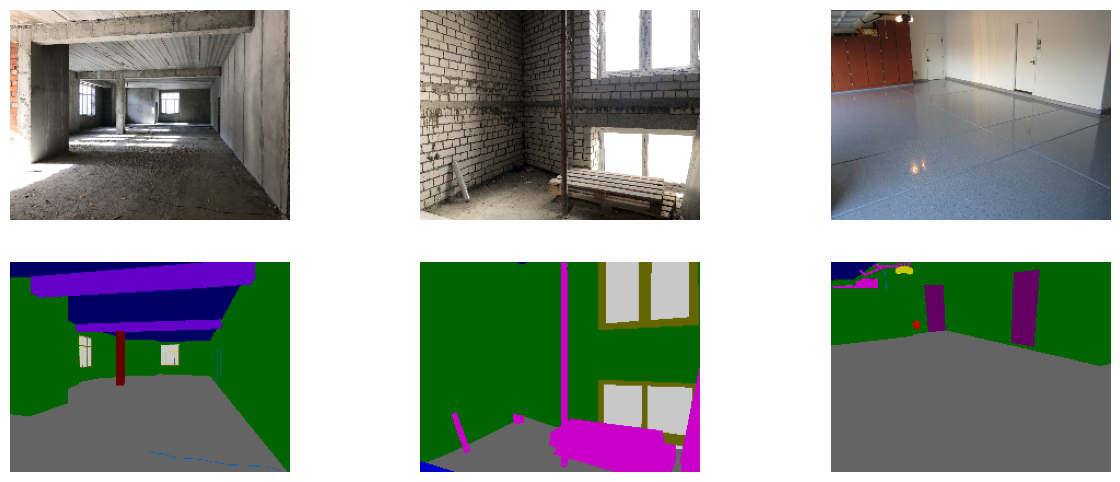

In [6]:
# предобработка данных
x_data, y_data, class_list = terra_seg.preprocess_data(folder, subset1, subset2, IMG_WIDTH, IMG_HEIGHT, num_classes=None)

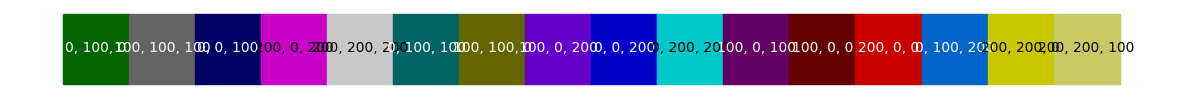

In [7]:
# @title Функция показа цвета

def color_show(lst, n):
  # Настройка размера фигуры
  plt.figure(figsize=(n, 1))

  # Проход по списку цветов для отрисовки и подписи
  for i, color in enumerate(lst):
      plt.fill_between([i, i+1], 0, 1, color=[c/255 for c in color]) # метод fill_between в данном контексте создаёт прямоугольник для каждого цвета из списка, используя соответствующий интервал по оси X и фиксированную высоту по оси Y, а также заданный цвет заливки. Это позволяет визуализировать каждый цвет из списка в виде отдельной полосы на графике.
      plt.text(i+0.5, 0.5, f'{color[0]}, {color[1]}, {color[2]}', ha='center', va='center', color='w' if sum(color) < 255*1.5 else 'black')

  # Удаление осей для лучшей визуализации
  plt.axis('off')
  plt.show()

color_show(class_list, 15)

In [8]:
parameters_1 = {
    'filters': 8,
    'kernel': (3,4),
    'pool_size': 2,
    'num_layers': 3,
    'class_count': 16,
    'input_shape':(192, 256, 3),
    'model_name': 'Unet_1'}

# Создаем модель, передаем параметры в виде словаря
model_1, parameters_1 = terra_seg.get_model_Unet(x_data, y_data, class_list, parameters_dict=parameters_1)

Размер батча: 16
Количество эпох: 10
Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 55s 319ms/step - loss: 2.5550 - sparse_categorical_accuracy: 0.1973 - val_loss: 2.6722 - val_sparse_categorical_accuracy: 0.1825 - learning_rate: 1.0000e-04
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 43s 87ms/step - loss: 2.1804 - sparse_categorical_accuracy: 0.3863 - val_loss: 2.3882 - val_sparse_categorical_accuracy: 0.3867 - learning_rate: 1.0000e-04
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - loss: 1.8517 - sparse_categorical_accuracy: 0.5274 - val_loss: 1.8533 - val_sparse_categorical_accuracy: 0.5200 - learning_rate: 1.0000e-04
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - loss: 1.6455 - sparse_categorical_accuracy: 0.5745 - val_loss: 1.5425 - val_sparse_categorical_accuracy: 0.5930 - learning_rate: 1.0000e-04
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - loss: 1.4774 - sparse_categorical_accuracy: 0.6027 - val_loss: 1.4253 - val_sparse_categorical_accuracy: 0.6128 - learning_rate: 1.0

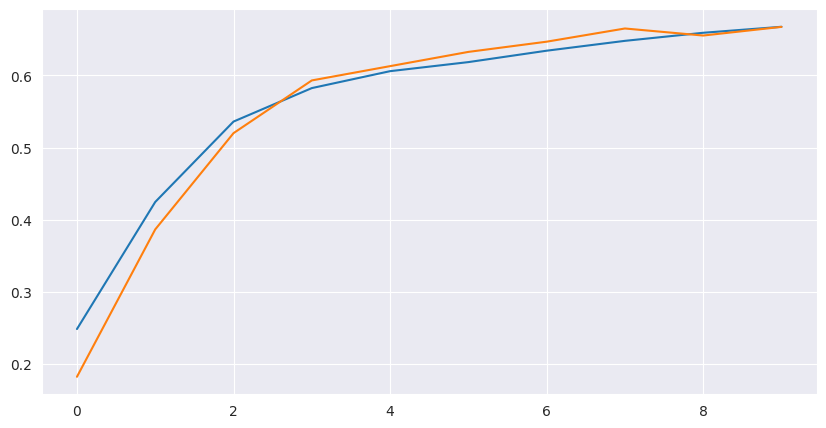

Средняя точность модели на тестовой выборке: 0.6642369627952576


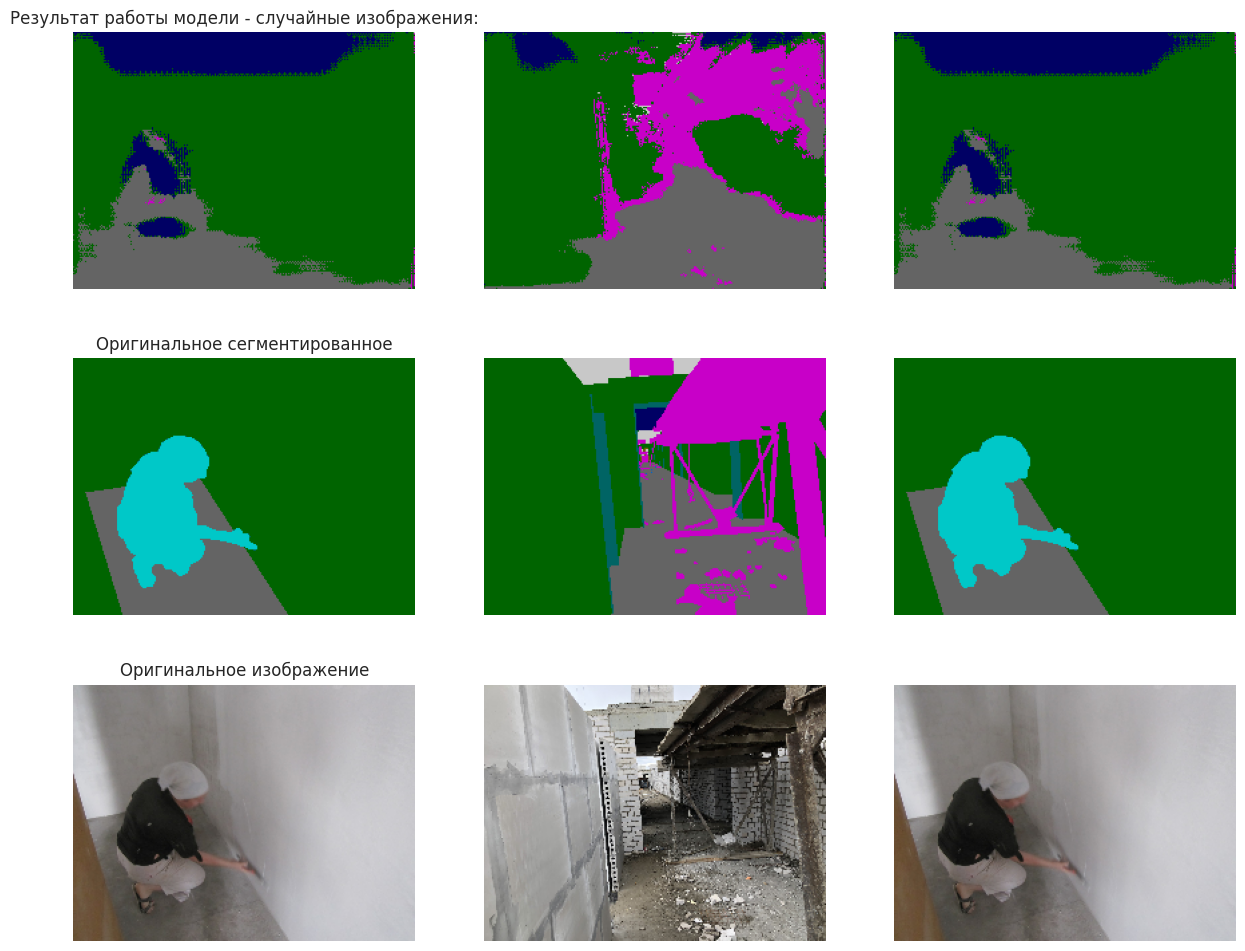

In [9]:
# Обучение и оценка первой модели
# Количество эпох и размер батча вводим вручную в строке ввода!

result_1 = terra_seg.train_eval_modelUnet(
    model_1,
    parameters_1,  # словарь параметров, созданный ранее
    x_data,
    y_data,
    class_list=class_list)

In [10]:
display(result_1)

filters  kernel  pool_size  num_layers  batch_size  accuracy
Unet_1        8  (3, 4)          2           3          16  0.664237

Следующая модель

In [11]:
parameters_2 = {
    'filters': 32,
    'kernel': (5,5),
    'pool_size': 2,
    'num_layers': 3,
    'class_count': 16,
    'input_shape':(192, 256, 3),
    'model_name': 'Unet_2'}

# Создаем модель, передаем параметры в виде словаря
model_2, parameters_2 = terra_seg.get_model_Unet(x_data, y_data, class_list, parameters_dict=parameters_2)

Размер батча: 16
Количество эпох: 10
Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - loss: 2.2264 - sparse_categorical_accuracy: 0.3729 - val_loss: 2.4755 - val_sparse_categorical_accuracy: 0.2973 - learning_rate: 1.0000e-04
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 101s 490ms/step - loss: 1.2360 - sparse_categorical_accuracy: 0.6670 - val_loss: 1.4953 - val_sparse_categorical_accuracy: 0.6023 - learning_rate: 1.0000e-04
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 82s 485ms/step - loss: 1.0403 - sparse_categorical_accuracy: 0.7006 - val_loss: 1.2402 - val_sparse_categorical_accuracy: 0.6323 - learning_rate: 1.0000e-04
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 82s 486ms/step - loss: 0.9495 - sparse_categorical_accuracy: 0.7208 - val_loss: 1.0004 - val_sparse_categorical_accuracy: 0.7122 - learning_rate: 1.0000e-04
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 81s 477ms/step - loss: 0.9022 - sparse_categorical_accuracy: 0.7317 - val_loss: 0.9105 - val_sparse_categorical_accuracy: 0.7273 - learning_rate: 

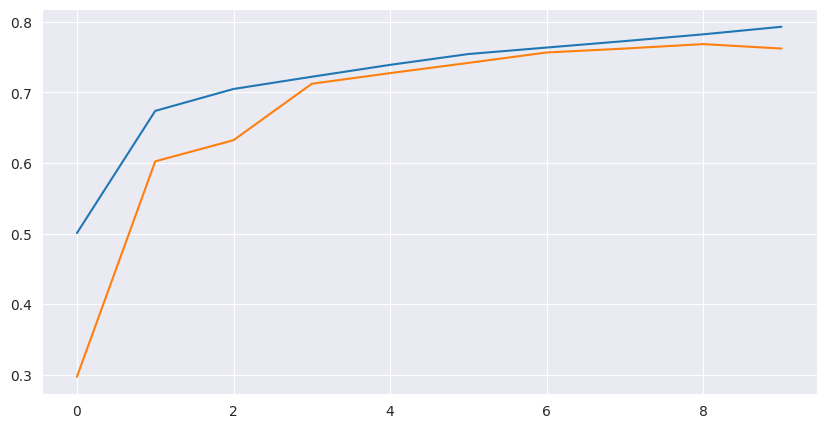

Средняя точность модели на тестовой выборке: 0.7596485018730164


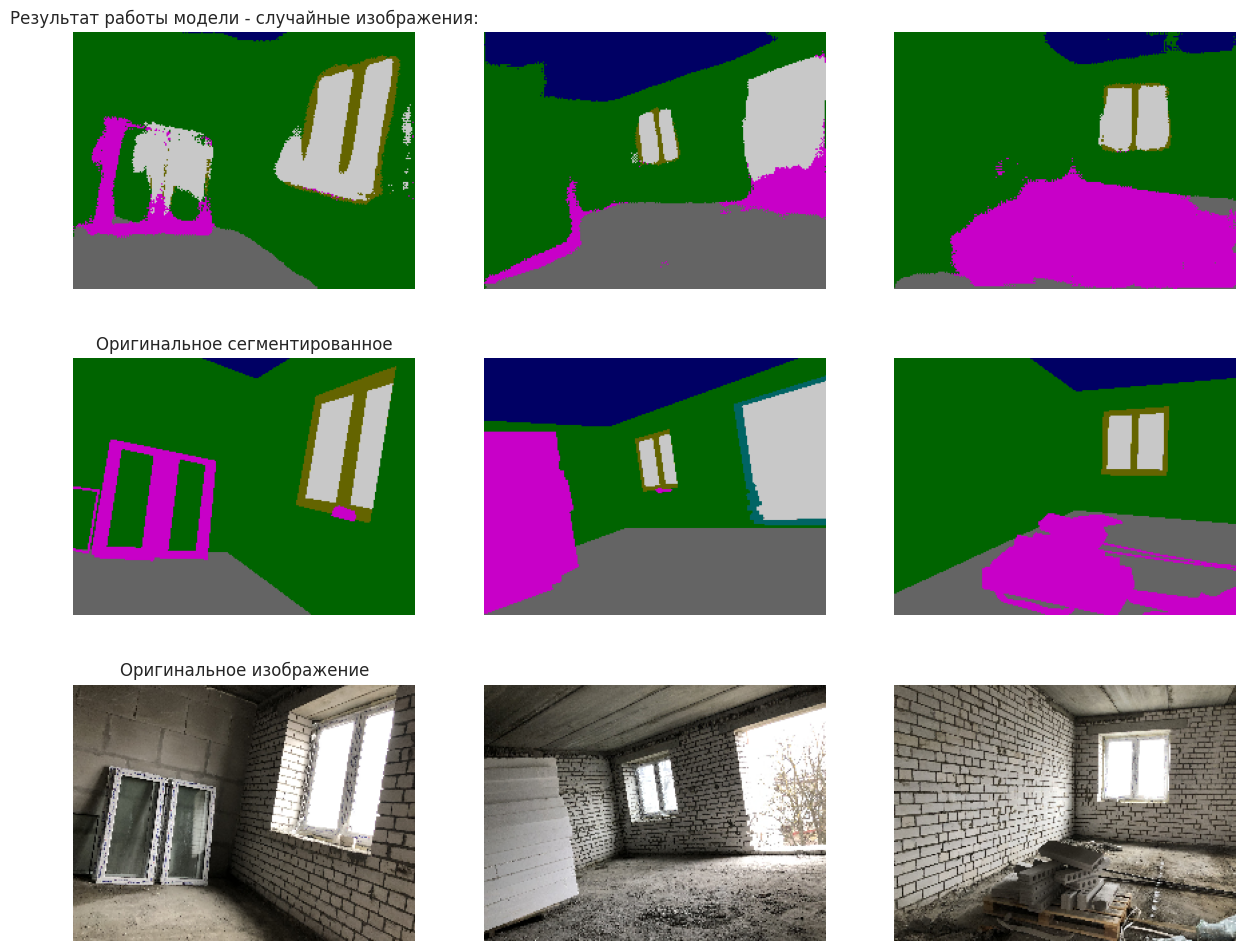

In [12]:
# Обучение и оценка второй модели

result_2 = terra_seg.train_eval_modelUnet(
    model_2,
    parameters_2,  # словарь параметров, созданный ранее
    x_data,
    y_data,
    class_list=class_list)

In [13]:
display(result_2)

filters  kernel  pool_size  num_layers  batch_size  accuracy
Unet_2       32  (5, 5)          2           3          16  0.759649

Результат интресный. Попробуем уменьшить количество фильтров, уменьшить ядро и увеличить количество слоев.

In [14]:
parameters_3 = {
    'filters': 8,
    'kernel': (3,3),
    'pool_size': 2,
    'num_layers': 4,
    'class_count': 16,
    'input_shape':(192, 256, 3),
    'model_name': 'Unet_3'}

# Создаем модель, передаем параметры в виде словаря
model_3, parameters_3 = terra_seg.get_model_Unet(x_data, y_data, class_list, parameters_dict=parameters_3)

Размер батча: 16
Количество эпох: 10
Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 57s 329ms/step - loss: 2.5267 - sparse_categorical_accuracy: 0.2071 - val_loss: 2.5688 - val_sparse_categorical_accuracy: 0.2680 - learning_rate: 1.0000e-04
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 43s 77ms/step - loss: 2.1576 - sparse_categorical_accuracy: 0.3471 - val_loss: 2.3070 - val_sparse_categorical_accuracy: 0.3880 - learning_rate: 1.0000e-04
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 1.8951 - sparse_categorical_accuracy: 0.4397 - val_loss: 1.8634 - val_sparse_categorical_accuracy: 0.5082 - learning_rate: 1.0000e-04
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 1.6610 - sparse_categorical_accuracy: 0.5595 - val_loss: 1.5696 - val_sparse_categorical_accuracy: 0.5808 - learning_rate: 1.0000e-04
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - loss: 1.4999 - sparse_categorical_accuracy: 0.6093 - val_loss: 1.3655 - val_sparse_categorical_accuracy: 0.6442 - learning_rate: 1.000

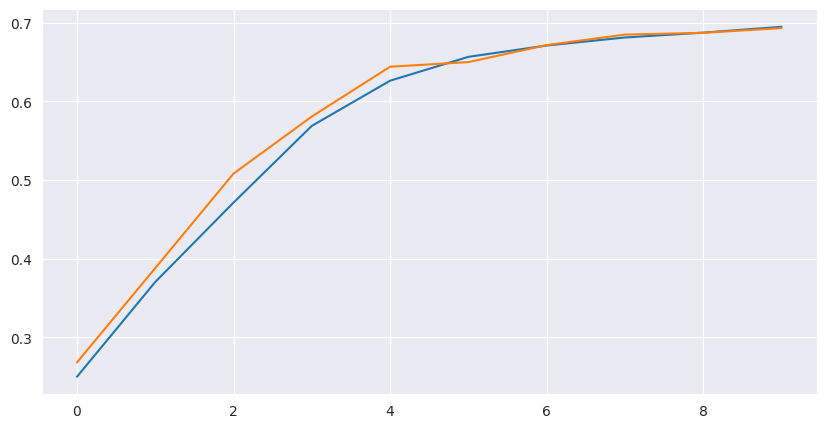

Средняя точность модели на тестовой выборке: 0.6806169748306274


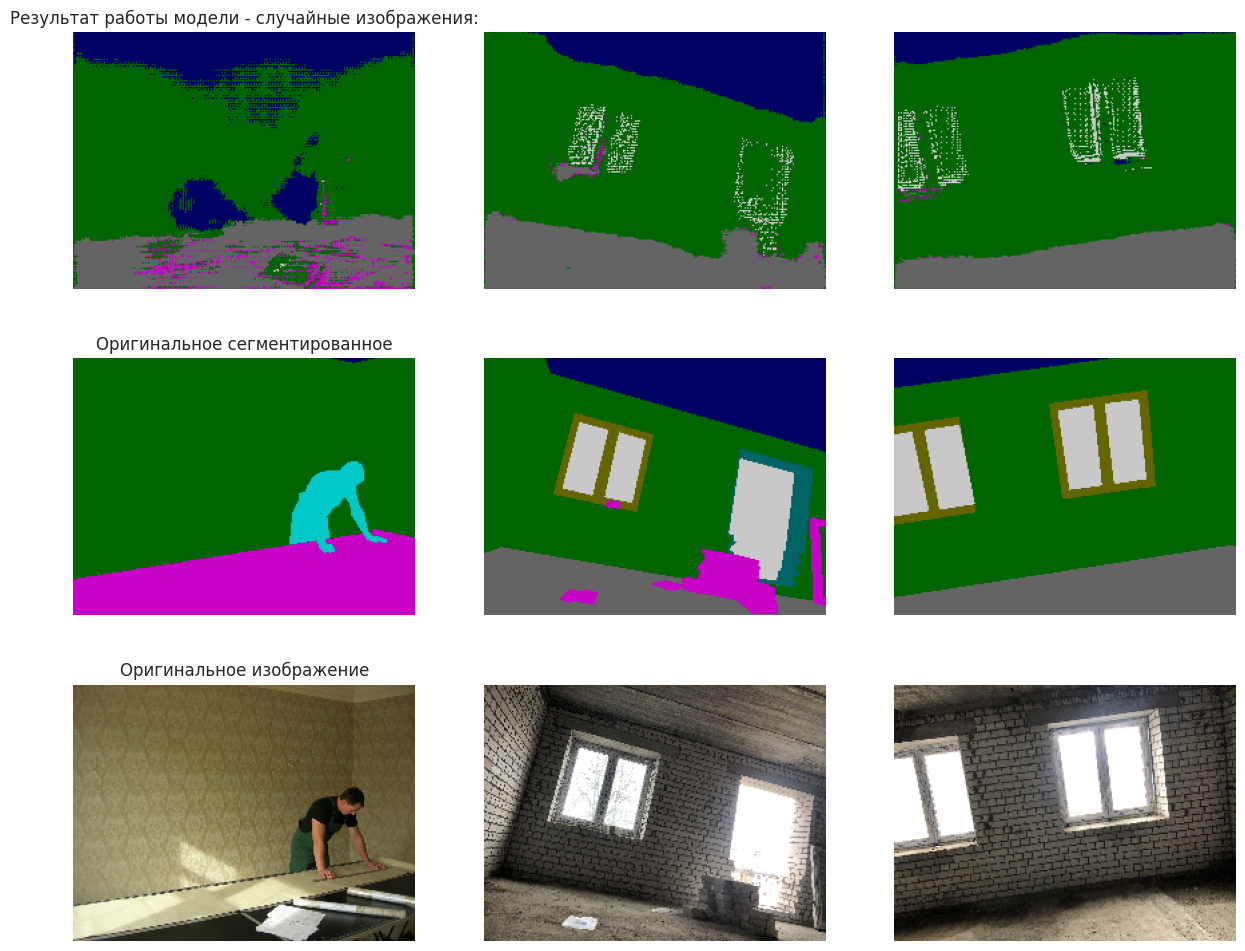

In [15]:
# Обучение и оценка третьей модели

result_3 = terra_seg.train_eval_modelUnet(
    model_3,
    parameters_3,  # словарь параметров, созданный ранее
    x_data,
    y_data,
    class_list=class_list)

In [16]:
display(result_3)

filters  kernel  pool_size  num_layers  batch_size  accuracy
Unet_3        8  (3, 3)          2           4          16  0.680617

In [18]:
parameters_4 = {
    'filters': 32,
    'kernel': (3,3),
    'pool_size': 2,
    'num_layers': 3,
    'class_count': 16,
    'input_shape':(192, 256, 3),
    'model_name': 'Unet_4'}

# Создаем модель, передаем параметры в виде словаря
model_4, parameters_4 = terra_seg.get_model_Unet(x_data, y_data, class_list, parameters_dict=parameters_4)

Размер батча: 16
Количество эпох: 10
Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 100s 641ms/step - loss: 2.6330 - sparse_categorical_accuracy: 0.2056 - val_loss: 2.4959 - val_sparse_categorical_accuracy: 0.2447 - learning_rate: 1.0000e-04
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 73s 262ms/step - loss: 1.5191 - sparse_categorical_accuracy: 0.6085 - val_loss: 1.6996 - val_sparse_categorical_accuracy: 0.5315 - learning_rate: 1.0000e-04
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 40s 254ms/step - loss: 1.2451 - sparse_categorical_accuracy: 0.6562 - val_loss: 1.3895 - val_sparse_categorical_accuracy: 0.6059 - learning_rate: 1.0000e-04
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 257ms/step - loss: 1.0938 - sparse_categorical_accuracy: 0.6878 - val_loss: 1.1394 - val_sparse_categorical_accuracy: 0.6835 - learning_rate: 1.0000e-04
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 42s 267ms/step - loss: 1.0212 - sparse_categorical_accuracy: 0.6998 - val_loss: 1.0383 - val_sparse_categorical_accuracy: 0.6937 - learning_rate

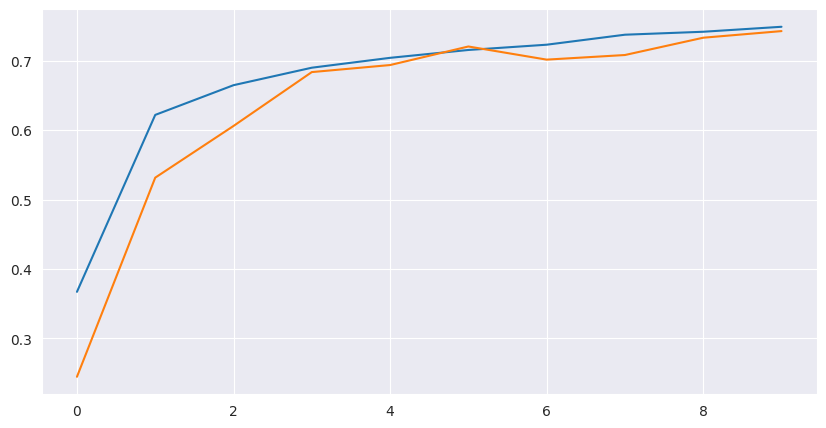

Средняя точность модели на тестовой выборке: 0.7370664477348328


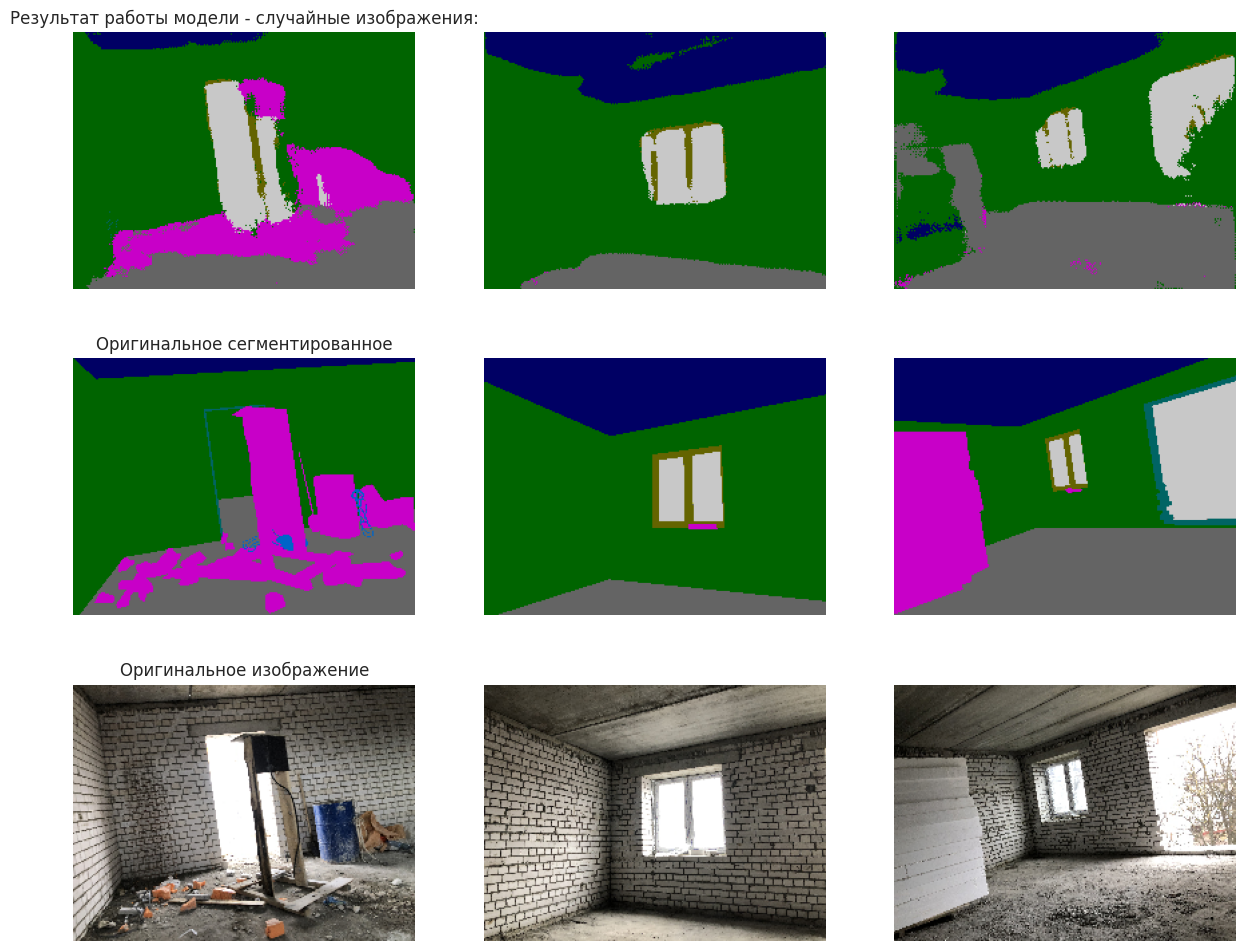

In [19]:
# Обучение и оценка четвертой модели

result_4 = terra_seg.train_eval_modelUnet(
    model_4,
    parameters_4,  # словарь параметров, созданный ранее
    x_data,
    y_data,
    class_list=class_list)

In [20]:
display(result_4)

filters  kernel  pool_size  num_layers  batch_size  accuracy
Unet_4       32  (3, 3)          2           3          16  0.737066

:Еще увеличим число фильтров и уменьшим ядро.

In [26]:
parameters_5 = {
    'filters': 64,
    'kernel': (2,2),
    'pool_size': 2,
    'num_layers': 3,
    'class_count': 16,
    'input_shape':(192, 256, 3),
    'model_name': 'Unet_5'}

# Создаем модель, передаем параметры в виде словаря
model_5, parameters_5 = terra_seg.get_model_Unet(x_data, y_data, class_list, parameters_dict=parameters_5)

Размер батча: 16
Количество эпох: 10
Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 75s 686ms/step - loss: 2.2903 - sparse_categorical_accuracy: 0.3235 - val_loss: 2.3703 - val_sparse_categorical_accuracy: 0.2997 - learning_rate: 1.0000e-04
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 64s 569ms/step - loss: 1.3906 - sparse_categorical_accuracy: 0.5896 - val_loss: 1.6578 - val_sparse_categorical_accuracy: 0.5146 - learning_rate: 1.0000e-04
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 84s 589ms/step - loss: 1.2465 - sparse_categorical_accuracy: 0.6183 - val_loss: 1.3628 - val_sparse_categorical_accuracy: 0.5985 - learning_rate: 1.0000e-04
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 82s 589ms/step - loss: 1.1807 - sparse_categorical_accuracy: 0.6365 - val_loss: 1.1819 - val_sparse_categorical_accuracy: 0.6467 - learning_rate: 1.0000e-04
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 82s 589ms/step - loss: 1.1046 - sparse_categorical_accuracy: 0.6601 - val_loss: 1.1247 - val_sparse_categorical_accuracy: 0.6485 - learning_rate:

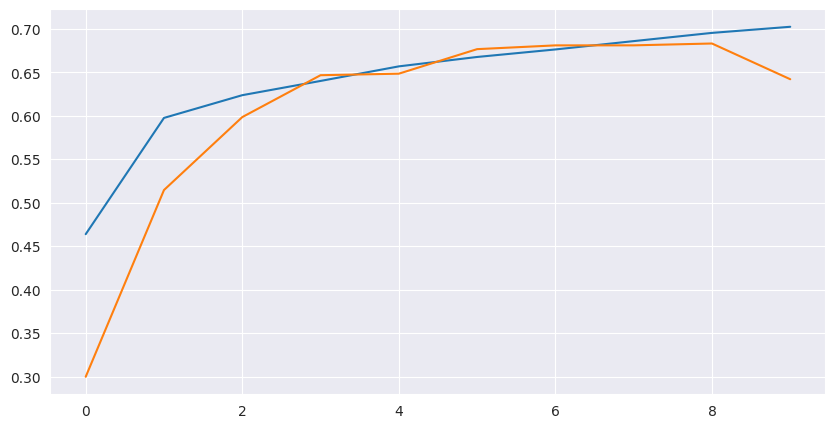

Средняя точность модели на тестовой выборке: 0.6563714146614075


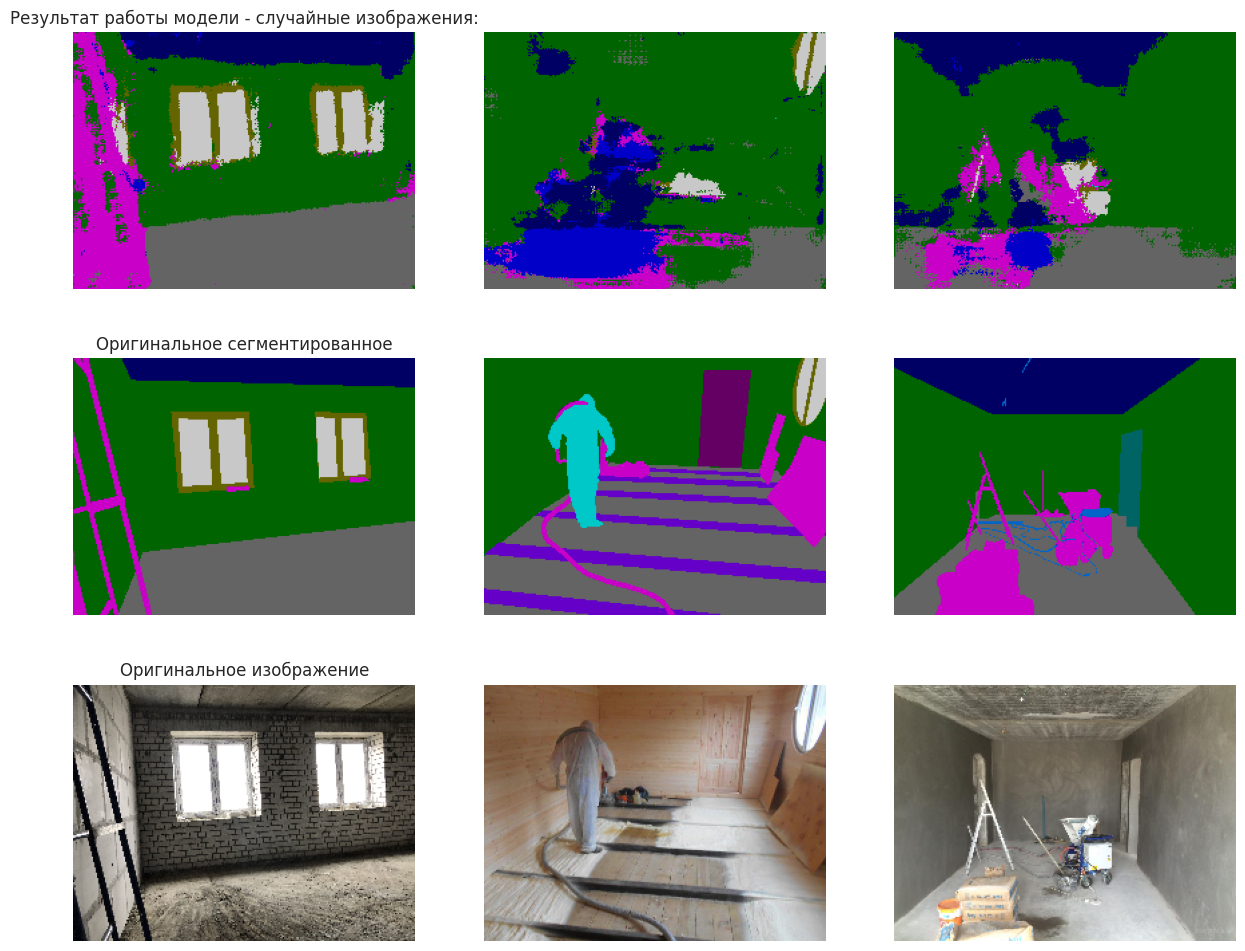

In [27]:
# Обучение и оценка пятой модели

result_5 = terra_seg.train_eval_modelUnet(
    model_5,
    parameters_5,  # словарь параметров, созданный ранее
    x_data,
    y_data,
    class_list=class_list)

In [28]:
display(result_5)

filters  kernel  pool_size  num_layers  batch_size  accuracy
Unet_5       64  (2, 2)          2           3          16  0.656371

In [ ]:
# Итоговая сравнительная таблица по всем моделям
'''

        filters	kernel	pool_size	num_layers	batch_size	accuracy
Unet_1	8	      (3, 4)	  2	        3	          16	      0.664237
Unet_2	32	    (5, 5)	  2	        3	          16	      0.759649
Unet_3	8	      (3, 3)	  2	        4	          16	      0.680617
Unet_4	32	    (3, 3)	  2	        3	          16	      0.737066
Unet_5	64	    (2, 2)	  2	        3	          16	      0.656371
'''

In [ ]:
'''
Вывод:
Наилучшие результаты дала модель Unet_2. Вторая, близкая к ней Unet_4
'''